# Thesis Project Code
## By Brett Zeligson
### Advisor: Professor Szymon Rusinkiewicz

Connect Google Drive

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection and Organization

## Geographic Data Collection

In [ ]:
# Merge all dataframes into one dataframe
def mergefiles(dfs, countfiles, i=0):
    if i == (countfiles - 2): # it gets to the second to last and merges it with the last
        return

    print(dfs[i + 1])
    dfm = dfs[i].merge(mergefiles(dfs[i+1], countfiles, i=i+1), on='date')
    return dfm

In [ ]:
# Geographic dataset names for NYC
nyc_temp_elev_cloud_dew_precip_data = {
    "Temperature": 'results_nyc_average_temperature_TableToExcel.xlsx',
    "Elevation": 'results_nyc_average_elevation_TableToExcel.xlsx',
    "Cloud Trans.": 'results_nyc_average_cloud_transmittance_TableToExcel.xlsx',
    "Dew Point Temp": 'results_nyc_average_dew_point_temperature_TableToExcel.xlsx',
    "Precipitation": 'results_nyc_average_precipitation_TableToExcel.xlsx'
}

nyc_nature_data = {
    "Tree Canopy": 'results_nyc_tree_canopy.csv',
    "Imperviousness": 'results_nyc_imperviousness.csv',
}

nyc_dist_data = [
    'new_york_major_center_dist'
]

In [ ]:
# Geographic dataset names for LA
la_temp_elev_cloud_dew_precip_data = {
    "Temperature": 'results_LA_average_temperature_TableToExcel.xlsx',
    "Elevation": 'results_LA_average_elevation_TableToExcel.xlsx',
    "Cloud Trans.": 'results_LA_average_cloud_transmittance_TableToExcel.xlsx',
    "Dew Point Temp": 'results_LA_average_dew_point_temperature_TableToExcel.xlsx',
    "Precipitation": 'results_LA_average_precipitation_TableToExcel.xlsx'
}

la_nature_data = {
    "Tree Canopy": 'results_los_angeles_tree_canopy.csv',
    "Imperviousness": 'results_la_imperviousness.csv',
}

la_dist_data = [
    'LA Landmark Distance',
    'la_dist_to_major_centers'
]

In [ ]:
# Load geographic datasets and combine them together
dfs = []

for variable in la_temp_elev_cloud_dew_precip_data:
  file = la_temp_elev_cloud_dew_precip_data[variable]
  df = pd.read_excel('/content/drive/My Drive/Thesis Data/New Temp, etc. Data/LA/' + file, index_col=0)
  dfs.append(df[['FIPS', 'MEAN']])

for variable in la_nature_data:
  file = la_nature_data[variable]
  df = pd.read_csv('/content/drive/My Drive/Thesis Data/' + file)
  dfs.append(df[['FIPS', 'MEAN']])

col_names = ['FIPS',
             'Average Temperature (C)',
             'Average Elevation (ft)',
             'Average Cloud Transmittance',
             'Average Dew Point Temperature (C)',
             'Average Annual Precipitation (mm)',
             'Tree Canopy Cover (%)',
             'Imperviousness (%)'
             ]

print(col_names)

['FIPS', 'Average Temperature (C)', 'Average Elevation (ft)', 'Average Cloud Transmittance', 'Average Dew Point Temperature (C)', 'Average Annual Precipitation (mm)', 'Tree Canopy Cover (%)', 'Imperviousness (%)']


In [ ]:
# More geographic dataset reading and merging
landmark_dist_file = 'LA Landmark Dist.csv'
landmark_cols = ['DIST_TOWN_HALL',
                 'DIST_HOSPITAL',
                 'DIST_POLICE',
                 'DIST_FIRE',
                 'DIST_UNIVERSITY+TRADE'
                 ]

landmark_nice_col_names = [
    "Distance to Nearest Town Hall (m)",
    "Distance to Nearest Hospital (m)",
    "Distance to Nearest Police Station (m)",
    "Distance to Nearest Fire Department (m)",
    "Distance to Nearest University (m)"
]
df = pd.read_csv('/content/drive/My Drive/Thesis Data/' + landmark_dist_file)
dfs.append(df[['FIPS'] + landmark_cols])
col_names += landmark_nice_col_names

In [ ]:
# Additional geographic dataset reading and merging
nri_file = 'LA_NRI_DATA_Excel.xlsx'
nri_cols = ['SUM_BUILDVALUE',
            'SUM_AGRIVALUE',
            'SUM_RISK_SCORE',
            'SUM_EAL_SCORE',
            'SUM_SOVI_SCORE',
            'SUM_RESL_SCORE'
            ]

nri_nice_col_names = [
    'Building Value ($)',
    'Agriculture Value ($)',
    'National Risk Index Composite Score',
    'Expected Annual Loss Composite Score',
    'Social Vulnerability Score',
    'Community Resilience Score'
]

df = pd.read_excel('/content/drive/My Drive/Thesis Data/' + nri_file, index_col=0)
dfs.append(df[['FIPS'] + nri_cols])
col_names += nri_nice_col_names

In [ ]:
# Major center distance geographic data
dist_file = "la_major_center_dist.csv"
df = pd.read_csv('/content/drive/My Drive/Thesis Data/' + dist_file)
dfs.append(df[['FIPS', 'NEAR_DIST']])
col_names += ['Distance to Closest Major Center (m)']

In [ ]:
# Nearest distance to water geographic data
water_file = "LA_New_DistanceTo_WaterandCoast_FINAL.csv"
df = pd.read_csv('/content/drive/My Drive/Thesis Data/' + water_file)
dfs.append(df[['FIPS', 'NEAR_DIST']])
col_names += ['Distance to Nearest Water Body or Coast (m)']

In [ ]:
# Land use geographic data
land_file = "LA Land Use.csv"
df = pd.read_csv('/content/drive/My Drive/Thesis Data/' + land_file)

developed_df = pd.DataFrame(columns = ['FIPS', 'Percent Developed'])

curr_fips = ""
developed_count = 0
total_count = 0

# Calculate the percentage of each census tract that is developed
for index, row in df.iterrows():
  if not row["FIPS"] == curr_fips:
    if total_count > 0:
      addition = pd.DataFrame({'FIPS' : curr_fips,
                               'Percent Developed' : developed_count / total_count},
                              index=[0])
      developed_df = pd.concat([developed_df, addition])

    curr_fips = row["FIPS"]
    developed_count = 0
    total_count = 0

  if 'Developed' in row['Land_Cover_Class']:
    developed_count += int(row['Count'])

  total_count += int(row['Count'])

developed_df['Percent Developed'] = developed_df['Percent Developed'] * 100
dfs.append(developed_df[['FIPS', 'Percent Developed']])
col_names += ['Percent Developed (%)']

In [ ]:
# Merge all geographic datasets together and save the table
merged = dfs[0]

for i in range(len(dfs) - 1):
  merged = pd.merge(merged, dfs[i + 1], on='FIPS', suffixes=(f'_x{i}', f'_y{i}'))

merged.columns=col_names
merged.to_csv('LA_ALL_GEOGRAPHIC_DATA_FINAL.csv', index=True)

## Socioeconomic Data Collection

In [ ]:
# Retrieve all socioeconomic data
acs_cols = [
    "FIPS",
    "Median_Age_",
    "Average_Household_Size",
    "Median_Household_Income__In_2019_Inflation_Adjusted_Dollars_",
    "Per_Capita_Income__In_2019_Inflation_Adjusted_Dollars_",
    "Gini_Index",
    "Median_Gross_Rent_as_a_Percentage_of_Household__Income_in_the_Pa",
    "Median_Gross_Rent"
]

calc_cols = [
    "Population_16_Years_and_Over__in_Labor_Force__Civilian",
    "Civilian_Population_in_Labor_Force_16_Years_and_Over__Unemployed",
    "Population_25_Years_and_Over_",
    "Population_25_Years_and_Over__Less_than_High_School",
    "Population_25_Years_and_Over__Bachelor_s_Degree",
    "Population_25_Years_and_Over__Master_s_Degree",
    "Population_25_Years_and_Over__Professional_School_Degree",
    "Population_25_Years_and_Over__Doctorate_Degree"
]

acs_col_nice_names = [
    "FIPS",
    "Median Age",
    "Average Household Size",
    "Median Household Income ($)",
    "Per Capita Income ($)",
    "Gini Index",
    "Median Gross Rent as Percentage of Household Income (%)",
    "Median Gross Rent ($)",
    "Percentage of Population Unemployed (%)",
    "Percentage of Population without High School Diploma (%)",
    "Percentage of Population with Bachelor's Degree or More (%)"
]


In [ ]:
import numpy as np

# Read all socioeconomic data
acs_file_name = 'CT_LA_ACS_DATA.csv'
# acs_file_name = 'CT_NYC_ACS_DATA.csv'

y_df = pd.read_csv('/content/drive/My Drive/Thesis Data/ACS Data/' + acs_file_name)
y_df_data = y_df[acs_cols]
for_calcs = y_df[calc_cols]

# Socioeconomic data calculations for three variables
y_df_data["Percentage of Population Unemployed (%)"] = for_calcs.apply(lambda x: (x['Civilian_Population_in_Labor_Force_16_Years_and_Over__Unemployed']/x['Population_16_Years_and_Over__in_Labor_Force__Civilian']) * 100, axis=1)
y_df_data["Percentage of Population without High School Diploma (%)"] = for_calcs.apply(lambda x: (x['Population_25_Years_and_Over__Less_than_High_School']/x['Population_25_Years_and_Over_']) * 100, axis=1)
y_df_data["Percentage of Population with Bachelor's Degree or More (%)"] = for_calcs.apply(lambda x: ((x['Population_25_Years_and_Over__Bachelor_s_Degree'] + x['Population_25_Years_and_Over__Master_s_Degree'] + x['Population_25_Years_and_Over__Professional_School_Degree'] + x['Population_25_Years_and_Over__Doctorate_Degree'])/x['Population_25_Years_and_Over_']) * 100, axis=1)

# Save final socioeconomic variable dataset
y_df_data.columns=acs_col_nice_names
y_df_data.to_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_SOCIOECONOMIC_DATA_FINAL.csv', index=True)

In [ ]:
# Save combined geographic and socioeconomic dataset
geo = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_GEOGRAPHIC_DATA_FINAL.csv')
geo_col_names = list(geo.columns)[2:]

merged = pd.merge(geo, y_df_data, on='FIPS')
final_df = merged[geo_col_names + acs_col_nice_names]

final_df.to_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_SOCIO_AND_GEO_FINAL.csv', index=True)

# Linear and MLP Model Construction

In [ ]:
import numpy as np
import pandas as pd

# Read in all data and remove all rows containing a null entry
geo = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_GEOGRAPHIC_DATA_FINAL.csv')
socio = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_SOCIOECONOMIC_DATA_FINAL.csv')

final_df = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_SOCIO_AND_GEO_FINAL.csv')
final_df = final_df.dropna()

# Standardization
# normalized_df=(final_df-final_df.mean())/final_df.std()

# Min/Max Normalization
normalized_df=(final_df-final_df.min())/(final_df.max()-final_df.min())

geo_col_names = list(geo.columns)[2:]
socio_col_names = list(socio.columns)[2:]
print(geo_col_names)
print(socio_col_names)

['Average Temperature (C)', 'Average Elevation (ft)', 'Average Cloud Transmittance', 'Average Dew Point Temperature (C)', 'Average Annual Precipitation (mm)', 'Tree Canopy Cover (%)', 'Imperviousness (%)', 'Distance to Nearest Town Hall (m)', 'Distance to Nearest Hospital (m)', 'Distance to Nearest Police Station (m)', 'Distance to Nearest Fire Department (m)', 'Distance to Nearest University (m)', 'Building Value ($)', 'Agriculture Value ($)', 'National Risk Index Composite Score', 'Expected Annual Loss Composite Score', 'Social Vulnerability Score', 'Community Resilience Score', 'Distance to Closest Major Center (m)', 'Distance to Nearest Water Body or Coast (m)', 'Percent Developed (%)']
['Median Age', 'Average Household Size', 'Median Household Income ($)', 'Per Capita Income ($)', 'Gini Index', 'Median Gross Rent as Percentage of Household Income (%)', 'Median Gross Rent ($)', 'Percentage of Population Unemployed (%)', 'Percentage of Population without High School Diploma (%)', "P

In [ ]:
# Generate histograms of all normalized and un-normalized socioeconomic and geographic data
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

for label in (geo_col_names + socio_col_names):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(final_df[label], bins=100, color='skyblue', edgecolor='black')
  label = label.replace('.', '')
  plt.xlabel(label)
  plt.ylabel('Frequency')
  plt.title(f'{label} Histogram - NYC Metro')
  plt.savefig(f'/content/drive/MyDrive/Thesis Data/Images/NYC/{label} Histogram - LA Metro')
  plt.show()

for label in (geo_col_names + socio_col_names):
  figure(figsize=(8, 6), dpi=80)
  plt.hist(normalized_df[label], bins=100, color='red', edgecolor='black')
  label = label.replace('.', '')
  plt.xlabel(label)
  plt.ylabel('Frequency')
  plt.title(f'{label} Histogram - NYC Metro - Normalized')
  plt.savefig(f'/content/drive/MyDrive/Thesis Data/Images/NYC/{label} Histogram - LA Metro - Normalized')
  plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from torch.autograd import Variable
import torch

# Create training, testing, and validation datasets
X = normalized_df[geo_col_names].values.astype(np.float32)
y = normalized_df[socio_col_names].values.astype(np.float32)

X_hold, X_test, y_hold, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_hold, y_hold, test_size=0.125, random_state=40)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print()
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)
print()
print("X_val Shape:", X_val.shape)
print("y_val Shape:", y_val.shape)

pd.DataFrame(X_train).to_csv('X_train.csv', index=True)
pd.DataFrame(X_test).to_csv('X_test.csv', index=True)
pd.DataFrame(y_train).to_csv('y_train.csv', index=True)
pd.DataFrame(y_test).to_csv('y_test.csv', index=True)

X_all = Variable(torch.Tensor(X))
y_all = Variable(torch.Tensor(y))
X_train = Variable(torch.Tensor(X_train))
y_train = Variable(torch.Tensor(y_train))
X_val = Variable(torch.Tensor(X_val))
y_val = Variable(torch.Tensor(y_val))
X_test = Variable(torch.Tensor(X_test))
y_test = Variable(torch.Tensor(y_test))

X_train Shape: (3013, 21)
X_test Shape: (862, 21)

y_train Shape: (3013, 10)
y_test Shape: (862, 10)

X_val Shape: (431, 21)
y_val Shape: (431, 10)


In [ ]:
# Sources:
# https://www.kaggle.com/code/kanji10494/simple-mlp-regressor-using-pytorch
# https://discuss.pytorch.org/t/how-to-calculate-the-validation-loss-during-each-epoch-of-training/145272
# https://discuss.pytorch.org/t/sklearn-model-to-pytorch-model/33532
# https://stackoverflow.com/questions/54678896/pytorch-valueerror-optimizer-got-an-empty-parameter-list

import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils_data

loss_fct = nn.MSELoss()

# Architecture for linear and multi-layer perceptron models
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, output_size):
        super(MLP, self).__init__()
        self.nn_layers = nn.ModuleList()
        self.nn_layers.append(nn.Linear(input_size, hidden_layer_sizes[0]))

        for i in range(len(hidden_layer_sizes) - 1):
          self.nn_layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i+1]))

        self.nn_layers.append(nn.Linear(hidden_layer_sizes[-1], output_size))
        # self.double()

    def forward(self, x):
        out = x
        for i, layer in enumerate(self.nn_layers):
          if i != len(self.nn_layers) - 1:
            out = F.relu(layer(out))
          else:
            out = layer(out)
        return out

def train_model(config):
  input_size = X_train.size()[1]
  output_size = y_train.size()[1]

  # Hyperparameters
  num_epoch = config['num_epoch']
  learning_rate = config['learning_rate']
  batch_size = config['batch_size']

  # MLP Model Layers
  hidden_layer_sizes = config['hidden_layer_sizes']

  # Linear Model Layer
  # hidden_layer_sizes = [input_size]

  model = MLP(input_size = input_size,
              hidden_layer_sizes = hidden_layer_sizes,
              output_size = output_size)

  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  training_samples = utils_data.TensorDataset(X_train, y_train)
  data_loader_trn = utils_data.DataLoader(training_samples, batch_size = batch_size)

  epoch_loss = []
  epoch_val_loss = []
  best_loss = np.inf

  # Training
  for epoch in range(num_epoch):
    accuracy_loss = 0
    model.train()

    for batch_idx, (data, target) in enumerate(data_loader_trn):
        optimizer.zero_grad()

        pred = model(data)
        loss = loss_fct(pred, target)
        accuracy_loss += loss.item()

        loss.backward()
        optimizer.step()

    epoch_loss.append(accuracy_loss / (batch_idx + 1))

    if epoch % 10 == 0:
        print ('Epoch [%d/%d], Loss: %.4f'
                  %(epoch+1, num_epoch, accuracy_loss / (batch_idx + 1)))

    model.eval()
    y_val_pred = model(X_val)
    val_loss = loss_fct(y_val_pred, y_val)
    epoch_val_loss.append(val_loss.item())

    y_test_pred = model(X_test)
    test_loss = loss_fct(y_test_pred, y_test)

  return {"model": model,
          "epoch_loss": epoch_loss,
          "epoch_val_loss": epoch_val_loss,
          "loss": test_loss.item()}

## Hyperparameter Tuning

In [ ]:
# !pip install ray
from ray import tune

# Test models with all combinations of all the following parameters and determine
# the model with the lowest test loss
search_space = {
    "num_epoch": tune.grid_search([100]),
    "learning_rate": tune.grid_search([0.01, 0.001]),
    "batch_size": tune.grid_search([100, 200, 300]),
    "hidden_layer_sizes": tune.grid_search([[50, 25, 12],
      [50, 25, 50],
      [100, 50, 25, 12],
      [150, 100, 50, 25, 12],
      [150, 100, 50, 100, 150]])
}

tuner = tune.Tuner(train_model, param_space=search_space)

results = tuner.fit()
best_params = results.get_best_result(metric="loss", mode="min").config
print(best_params)

In [ ]:
import re

# Convert grid output from the previous cell to a Latex table format
def convert_grid_output_to_latex(grid_search_output):
  grid_search_output = re.sub(' +', ' ', grid_search_output)
  grid_search_output = grid_search_output.replace(' |', "\\\\")
  grid_search_output = grid_search_output.replace('| ', "")
  grid_search_output = grid_search_output.replace(' ', " & ")
  grid_search_output = grid_search_output.replace(', & ', ", ")
  grid_search_output = grid_search_output.split("\n")

  final = "\\hline\n"
  for entry in grid_search_output:
    if len(entry) > 0:
      cols = entry.split(" & ")
      final += (cols[3] + " & " + cols[4] + " & " + cols[-4] + " & " + str(round(float(cols[-1][:-4]), 5)) + "\\\\\n\\hline\n")

  return final

print(convert_grid_output_to_latex("""
| train_model_c8b34_00000   TERMINATED           100             0.01             100   [50, 25, 12]                1           15.3291    0.0105136  |
| train_model_c8b34_00001   TERMINATED           100             0.01             200   [50, 25, 12]                1            9.12868   0.0105255  |
| train_model_c8b34_00002   TERMINATED           100             0.01             300   [50, 25, 12]                1            7.75548   0.0110472  |
| train_model_c8b34_00003   TERMINATED           100             0.01             100   [50, 25, 50]                1           14.7225    0.00996641 |
| train_model_c8b34_00004   TERMINATED           100             0.01             200   [50, 25, 50]                1            9.33522   0.0102664  |
| train_model_c8b34_00005   TERMINATED           100             0.01             300   [50, 25, 50]                1            7.66955   0.0102998  |
| train_model_c8b34_00006   TERMINATED           100             0.01             100   [100, 50, 25, 12]           1           15.8328    0.0104743  |
| train_model_c8b34_00007   TERMINATED           100             0.01             200   [100, 50, 25, 12]           1           11.2094    0.00985736 |
| train_model_c8b34_00008   TERMINATED           100             0.01             300   [100, 50, 25, 12]           1           11.206     0.0113253  |
| train_model_c8b34_00009   TERMINATED           100             0.01             100   [150, 100, 50, 25, 12]        1           19.3996    0.0110723  |
| train_model_c8b34_00010   TERMINATED           100             0.01             200   [150, 100, 50, 25, 12]        1           15.4755    0.0100976  |
| train_model_c8b34_00011   TERMINATED           100             0.01             300   [150, 100, 50, 25, 12]        1           11.1177    0.0109566  |
| train_model_c8b34_00012   TERMINATED           100             0.01             100   [150, 100, 50, 100, 150]        1           22.2552    0.0107213  |
| train_model_c8b34_00013   TERMINATED           100             0.01             200   [150, 100, 50, 100, 150]        1           16.6465    0.0101621  |
| train_model_c8b34_00014   TERMINATED           100             0.01             300   [150, 100, 50, 100, 150]        1           14.5946    0.0102436  |
| train_model_c8b34_00015   TERMINATED           100             0.001            100   [50, 25, 12]                1           12.8715    0.0110902  |
| train_model_c8b34_00016   TERMINATED           100             0.001            200   [50, 25, 12]                1           10.4812    0.0119598  |
| train_model_c8b34_00017   TERMINATED           100             0.001            300   [50, 25, 12]                1            9.67524   0.0124021  |
| train_model_c8b34_00018   TERMINATED           100             0.001            100   [50, 25, 50]                1           12.9315    0.0102845  |
| train_model_c8b34_00019   TERMINATED           100             0.001            200   [50, 25, 50]                1           11.781     0.0112015  |
| train_model_c8b34_00020   TERMINATED           100             0.001            300   [50, 25, 50]                1           10.0297    0.0113071  |
| train_model_c8b34_00021   TERMINATED           100             0.001            100   [100, 50, 25, 12]           1           15.0321    0.010718   |
| train_model_c8b34_00022   TERMINATED           100             0.001            200   [100, 50, 25, 12]           1           11.9938    0.0118308  |
| train_model_c8b34_00023   TERMINATED           100             0.001            300   [100, 50, 25, 12]           1           11.4116    0.0121909  |
| train_model_c8b34_00024   TERMINATED           100             0.001            100   [150, 100, 50, 25, 12]        1           18.4938    0.010619   |
| train_model_c8b34_00025   TERMINATED           100             0.001            200   [150, 100, 50, 25, 12]        1           13.8179    0.0117949  |
| train_model_c8b34_00026   TERMINATED           100             0.001            300   [150, 100, 50, 25, 12]        1           12.3907    0.0119834  |
| train_model_c8b34_00027   TERMINATED           100             0.001            100   [150, 100, 50, 100, 150]        1           23.699     0.0101869  |
| train_model_c8b34_00028   TERMINATED           100             0.001            200   [150, 100, 50, 100, 150]        1           16.4407    0.0102555  |
| train_model_c8b34_00029   TERMINATED           100             0.001            300   [150, 100, 50, 100, 150]        1           11.4312    0.0102744  |"""))

## Final Linear and MLP Model Results

Epoch [1/100], Loss: 0.0468
Epoch [11/100], Loss: 0.0131
Epoch [21/100], Loss: 0.0120
Epoch [31/100], Loss: 0.0114
Epoch [41/100], Loss: 0.0107
Epoch [51/100], Loss: 0.0105
Epoch [61/100], Loss: 0.0100
Epoch [71/100], Loss: 0.0096
Epoch [81/100], Loss: 0.0091
Epoch [91/100], Loss: 0.0087


MLP(
  (nn_layers): ModuleList(
    (0): Linear(in_features=21, out_features=150, bias=True)
    (1): Linear(in_features=150, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=100, bias=True)
    (4): Linear(in_features=100, out_features=150, bias=True)
    (5): Linear(in_features=150, out_features=10, bias=True)
  )
)
Best Validation Loss: 0.012652981126226205
Test Loss: 0.010695844492511243


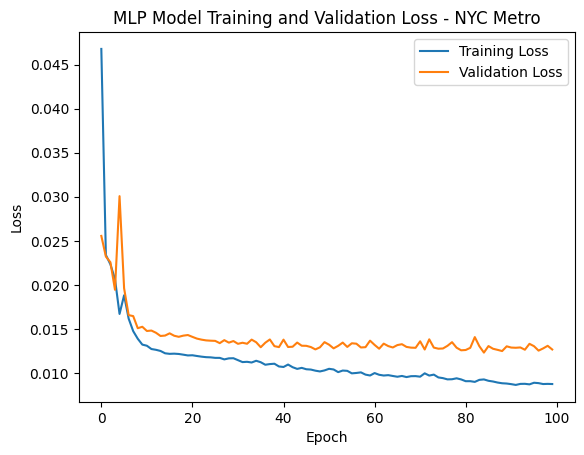

In [ ]:
# Parameters for the best linear and multi-layer perceptron models
# la_mlp_best_params = {'num_epoch': 100, 'learning_rate': 0.01, 'batch_size': 200, 'hidden_layer_sizes': [100, 50, 25, 12]}
# la_linear_best_params = {'num_epoch': 100, 'learning_rate': 0.01, 'batch_size': 100}
# nyc_linear_best_params = {'num_epoch': 100, 'learning_rate': 0.01, 'batch_size': 100}
nyc_mlp_best_params = {'num_epoch': 100, 'learning_rate': 0.01, 'batch_size': 200, 'hidden_layer_sizes': [150, 100, 50, 100, 150]}

best_model_res = train_model(nyc_mlp_best_params)
model = best_model_res['model']
epoch_loss = best_model_res['epoch_loss']
epoch_val_loss = best_model_res['epoch_val_loss']

print(model)

y_val_pred = model(X_val)
val_loss = loss_fct(y_val_pred, y_val)
print("Best Validation Loss:", val_loss.item())

y_test_pred = model(X_test)
test_loss = loss_fct(y_test_pred, y_test)
print("Test Loss:", test_loss.item())

# Plot model loss curves
plt.plot(epoch_loss, label="Training Loss")
plt.plot(epoch_val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Model Training and Validation Loss - NYC Metro")
plt.legend()
plt.show()

# Graph Construction

In [ ]:
# !pip install libpysal
# !pip install torch_geometric
# !pip install shapely

import geopandas as gpd

# Read geodataframe containing all census tract boundary information
# gdf = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_new_york_metroarea1Edited.zip')
gdf = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_los_angeles_metroarea1Edited.zip')

In [ ]:
import numpy as np
import pandas as pd

def make_string(fips):
  return str(round(fips))

# Read in all data and remove all rows containing a null entry
geo = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_GEOGRAPHIC_DATA_FINAL.csv')
socio = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_ALL_SOCIOECONOMIC_DATA_FINAL.csv')

final_df = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/LA_SOCIO_AND_GEO_FINAL.csv')
final_df = final_df.dropna()

# Normalize each column
for col in final_df.columns:
  if not col == 'FIPS' and not col == "Unnamed: 0" and not col == "FIPS.1":
    final_df[col] = (final_df[col] - final_df[col].min()) / (final_df[col].max() - final_df[col].min())
    # final_df[col] = (final_df[col] - final_df[col].mean()) / final_df[col].std()

final_df['FIPS'] = final_df['FIPS'].apply(make_string)

# Comment out this line for NYC data
gdf['FIPS'] = gdf['FIPS'].apply(lambda x: x[1:])

df_map = final_df.merge(gdf, how = 'outer', on = 'FIPS', indicator=True)
df_map = df_map[df_map['_merge']=='both']

# Merge geodata with the geographic and socioeconomic data
df_map = gpd.GeoDataFrame(
    df_map, geometry=df_map['geometry'], crs="EPSG:4326"
)

# Plot final map of census tracts with non-null data
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(25,12))
map = df_map.plot(ax=ax1)
map.get_yaxis().set_visible(False)
map.get_xaxis().set_visible(False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


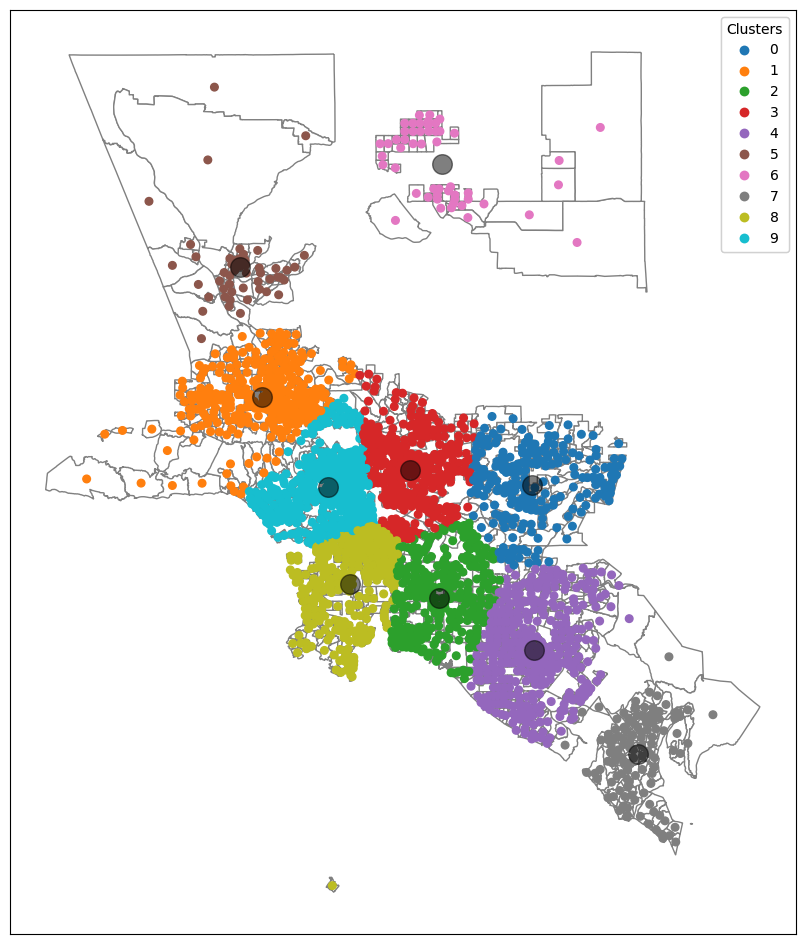

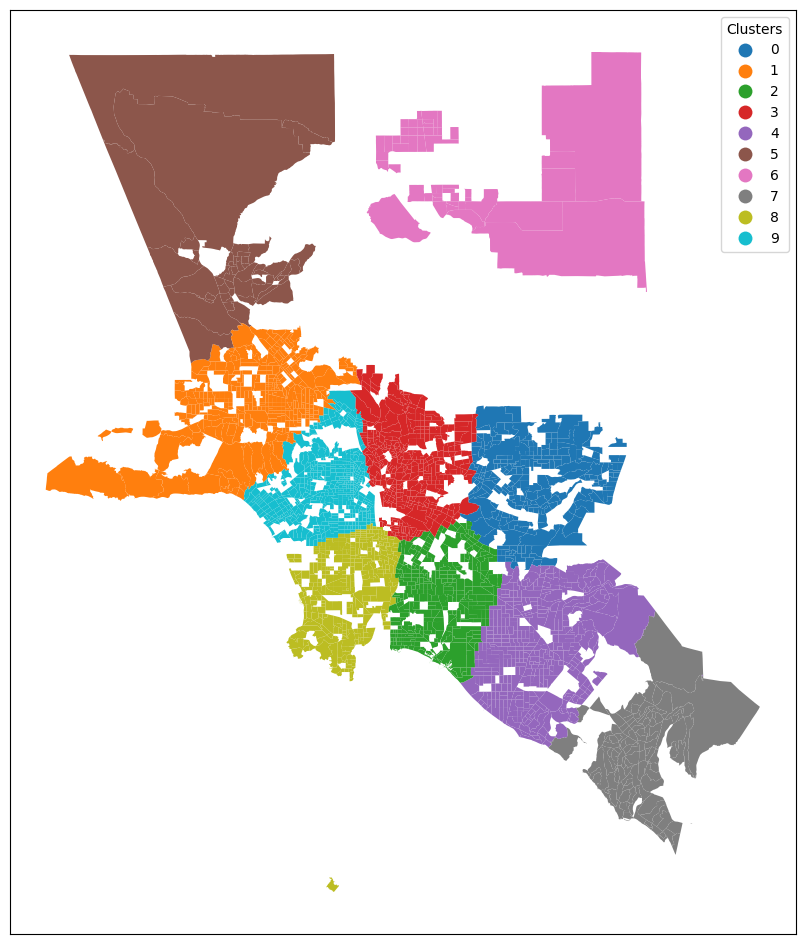

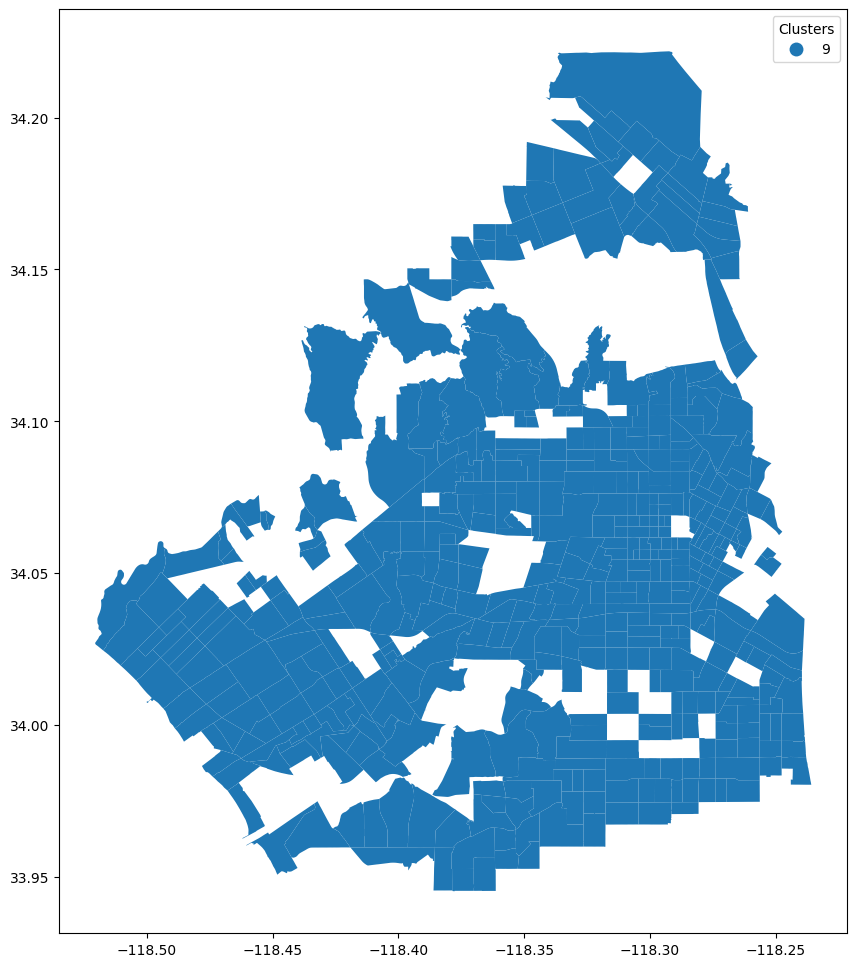

In [ ]:
import json
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from shapely import centroid

# Calculate centroids of all census tracts
coordinates = [[centroid(geom).x, centroid(geom).y] for geom in df_map['geometry']]
coordinates = np.array(coordinates)

# Train kmeans model
kmeans = KMeans(n_clusters=10)
kmeans.fit(coordinates)

# Plot cluster and census tract centroids
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(25,12))
map = df_map.plot(ax=ax1, facecolor='w', edgecolor='gray')
map.get_yaxis().set_visible(False)
map.get_xaxis().set_visible(False)
scatter = plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=30, cmap='tab10')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# Plot color-coded clusters
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(25,12))
df_map.loc[:, "cluster"] = kmeans.predict(coordinates)
map = df_map.plot(column="cluster", figsize=(25,12), legend=True, categorical=True,  cmap='tab10', ax=ax)
map.get_yaxis().set_visible(False)
map.get_xaxis().set_visible(False)
leg1 = ax.get_legend()
leg1.set_title("Clusters")

# Graph Construction Figures

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


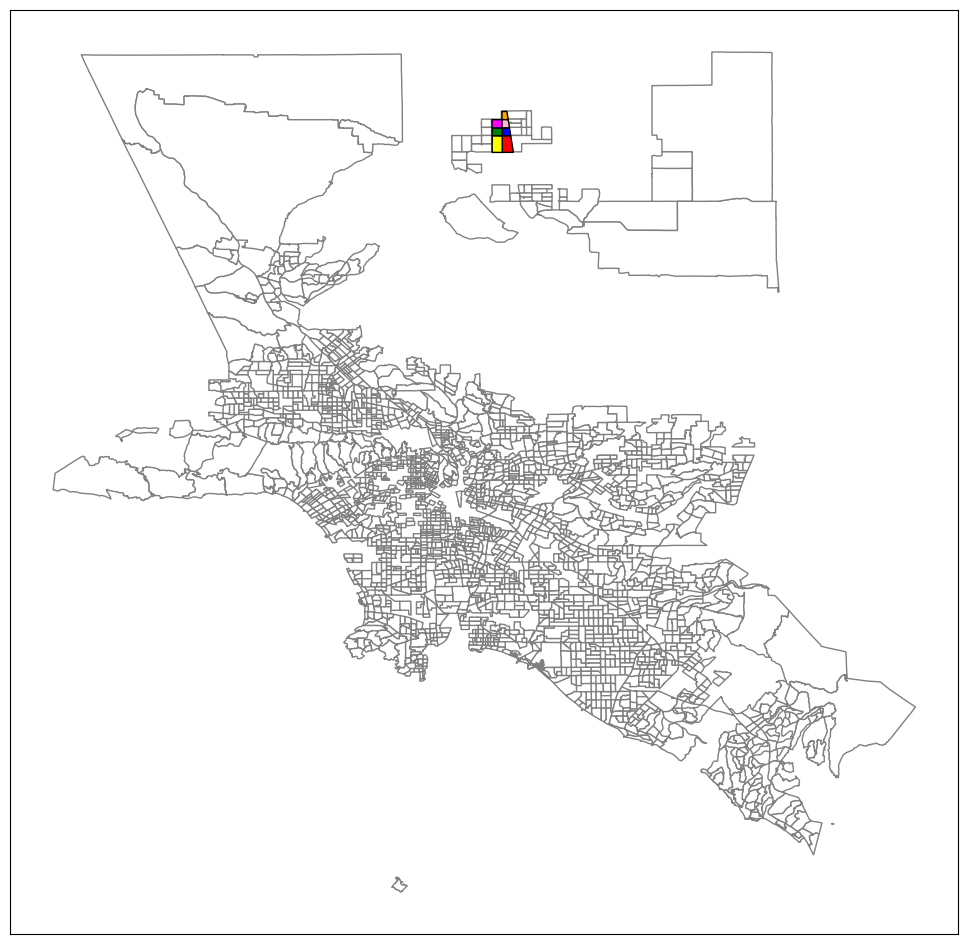

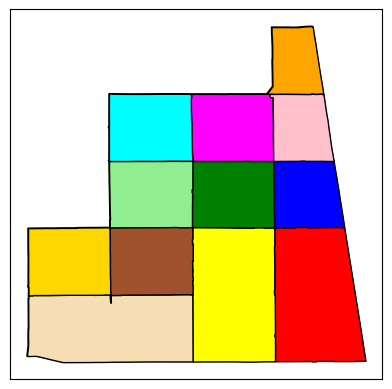

In [ ]:
# Test with extracting and color-coding a sample of census tracts
fig, base = plt.subplots(nrows=1,ncols=1, figsize=(25,12))
map = df_map.plot(ax=base, facecolor='w', edgecolor='gray')
map.get_yaxis().set_visible(False)
map.get_xaxis().set_visible(False)
trim = df_map[-12:]

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[0]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='blue', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[1]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='green', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[2]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='red', edgecolor='black')


test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[3]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='yellow', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[4]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='orange', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[5]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='magenta', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[6]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='pink', edgecolor='black')

# ----------------------- NEXT FIGURE ----------------------------

base = trim.plot(color='white', edgecolor='black', column='FIPS', legend=True)

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[0]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='blue', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[1]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='green', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[2]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='red', edgecolor='black')


test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[3]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='yellow', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[4]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='orange', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[5]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='magenta', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[6]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='pink', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[7]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='wheat', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[8]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='cyan', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[9]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='lightgreen', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[10]['geometry']]},
                       geometry='geometry')

test.plot(ax=base, color='gold', edgecolor='black')

test = gpd.GeoDataFrame({'id':list(range(0,1)),
                        'geometry':[trim.iloc[11]['geometry']]},
                       geometry='geometry')

map = test.plot(ax=base, color='sienna', edgecolor='black')
map.get_yaxis().set_visible(False)
map.get_xaxis().set_visible(False)

<ipython-input-153-2b971146c2b4>:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  gdf_neighbors = lp.weights.Queen.from_dataframe(trim)
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


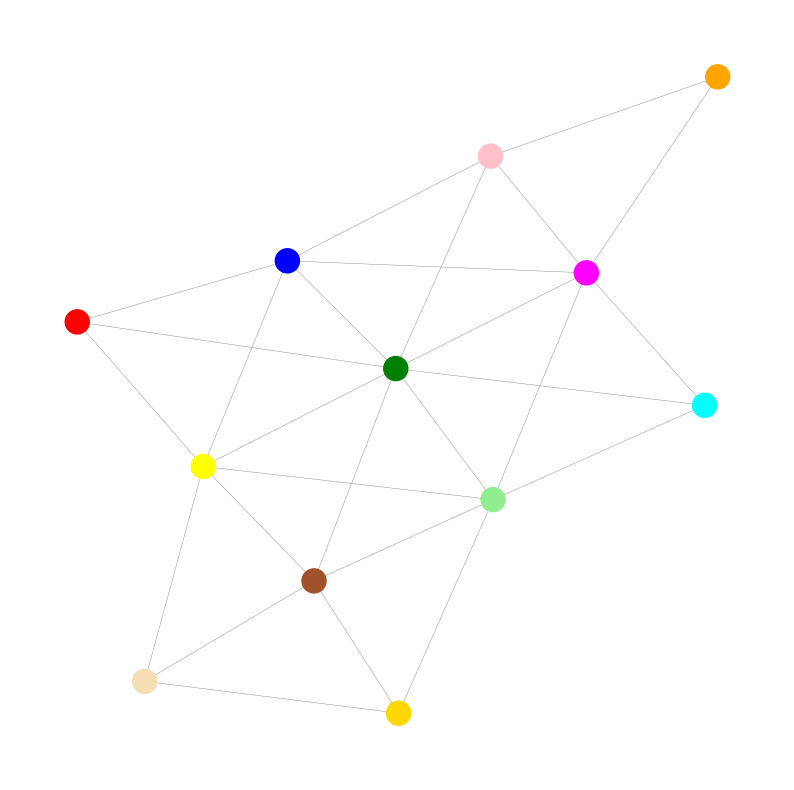

In [ ]:
from torch_geometric.data import Data
from torch import torch
from torch_geometric.utils import to_networkx
import networkx as nx
import libpysal as lp

# Extract sample of census tracts to turn into a graph
trim = df_map[-12:]

# Calculate census tract adjacency information for graph connectivity
gdf_neighbors = lp.weights.Queen.from_dataframe(trim)
gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)

edge_index = gdf_adj_mtx_torch.nonzero().t().contiguous()
data = Data(edge_index=edge_index)

colors = [['black'] * 12]
colors = colors[0]

colors[-12] = 'blue'
colors[-11] = 'green'
colors[-10] = 'red'
colors[-9] = 'yellow'
colors[-8] = 'orange'
colors[-7] = 'magenta'
colors[-6] = 'pink'
colors[-5] = 'wheat'
colors[-4] = 'cyan'
colors[-3] = 'lightgreen'
colors[-2] = 'gold'
colors[-1] = 'sienna'

# Plot the graph created from the sample of census tracts
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=False,
                node_size=300,
                node_color=colors,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.3,
                edge_color="grey",
                font_size=2,
                font_color='white'
              )
plt.show()

<ipython-input-154-49daf96689e4>:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  gdf_neighbors = lp.weights.Queen.from_dataframe(df_map)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 7 islands with ids: 0, 548, 693, 1155, 1321, 2271, 2307.
  W.__init__(self, neighbors, ids=ids, **kw)


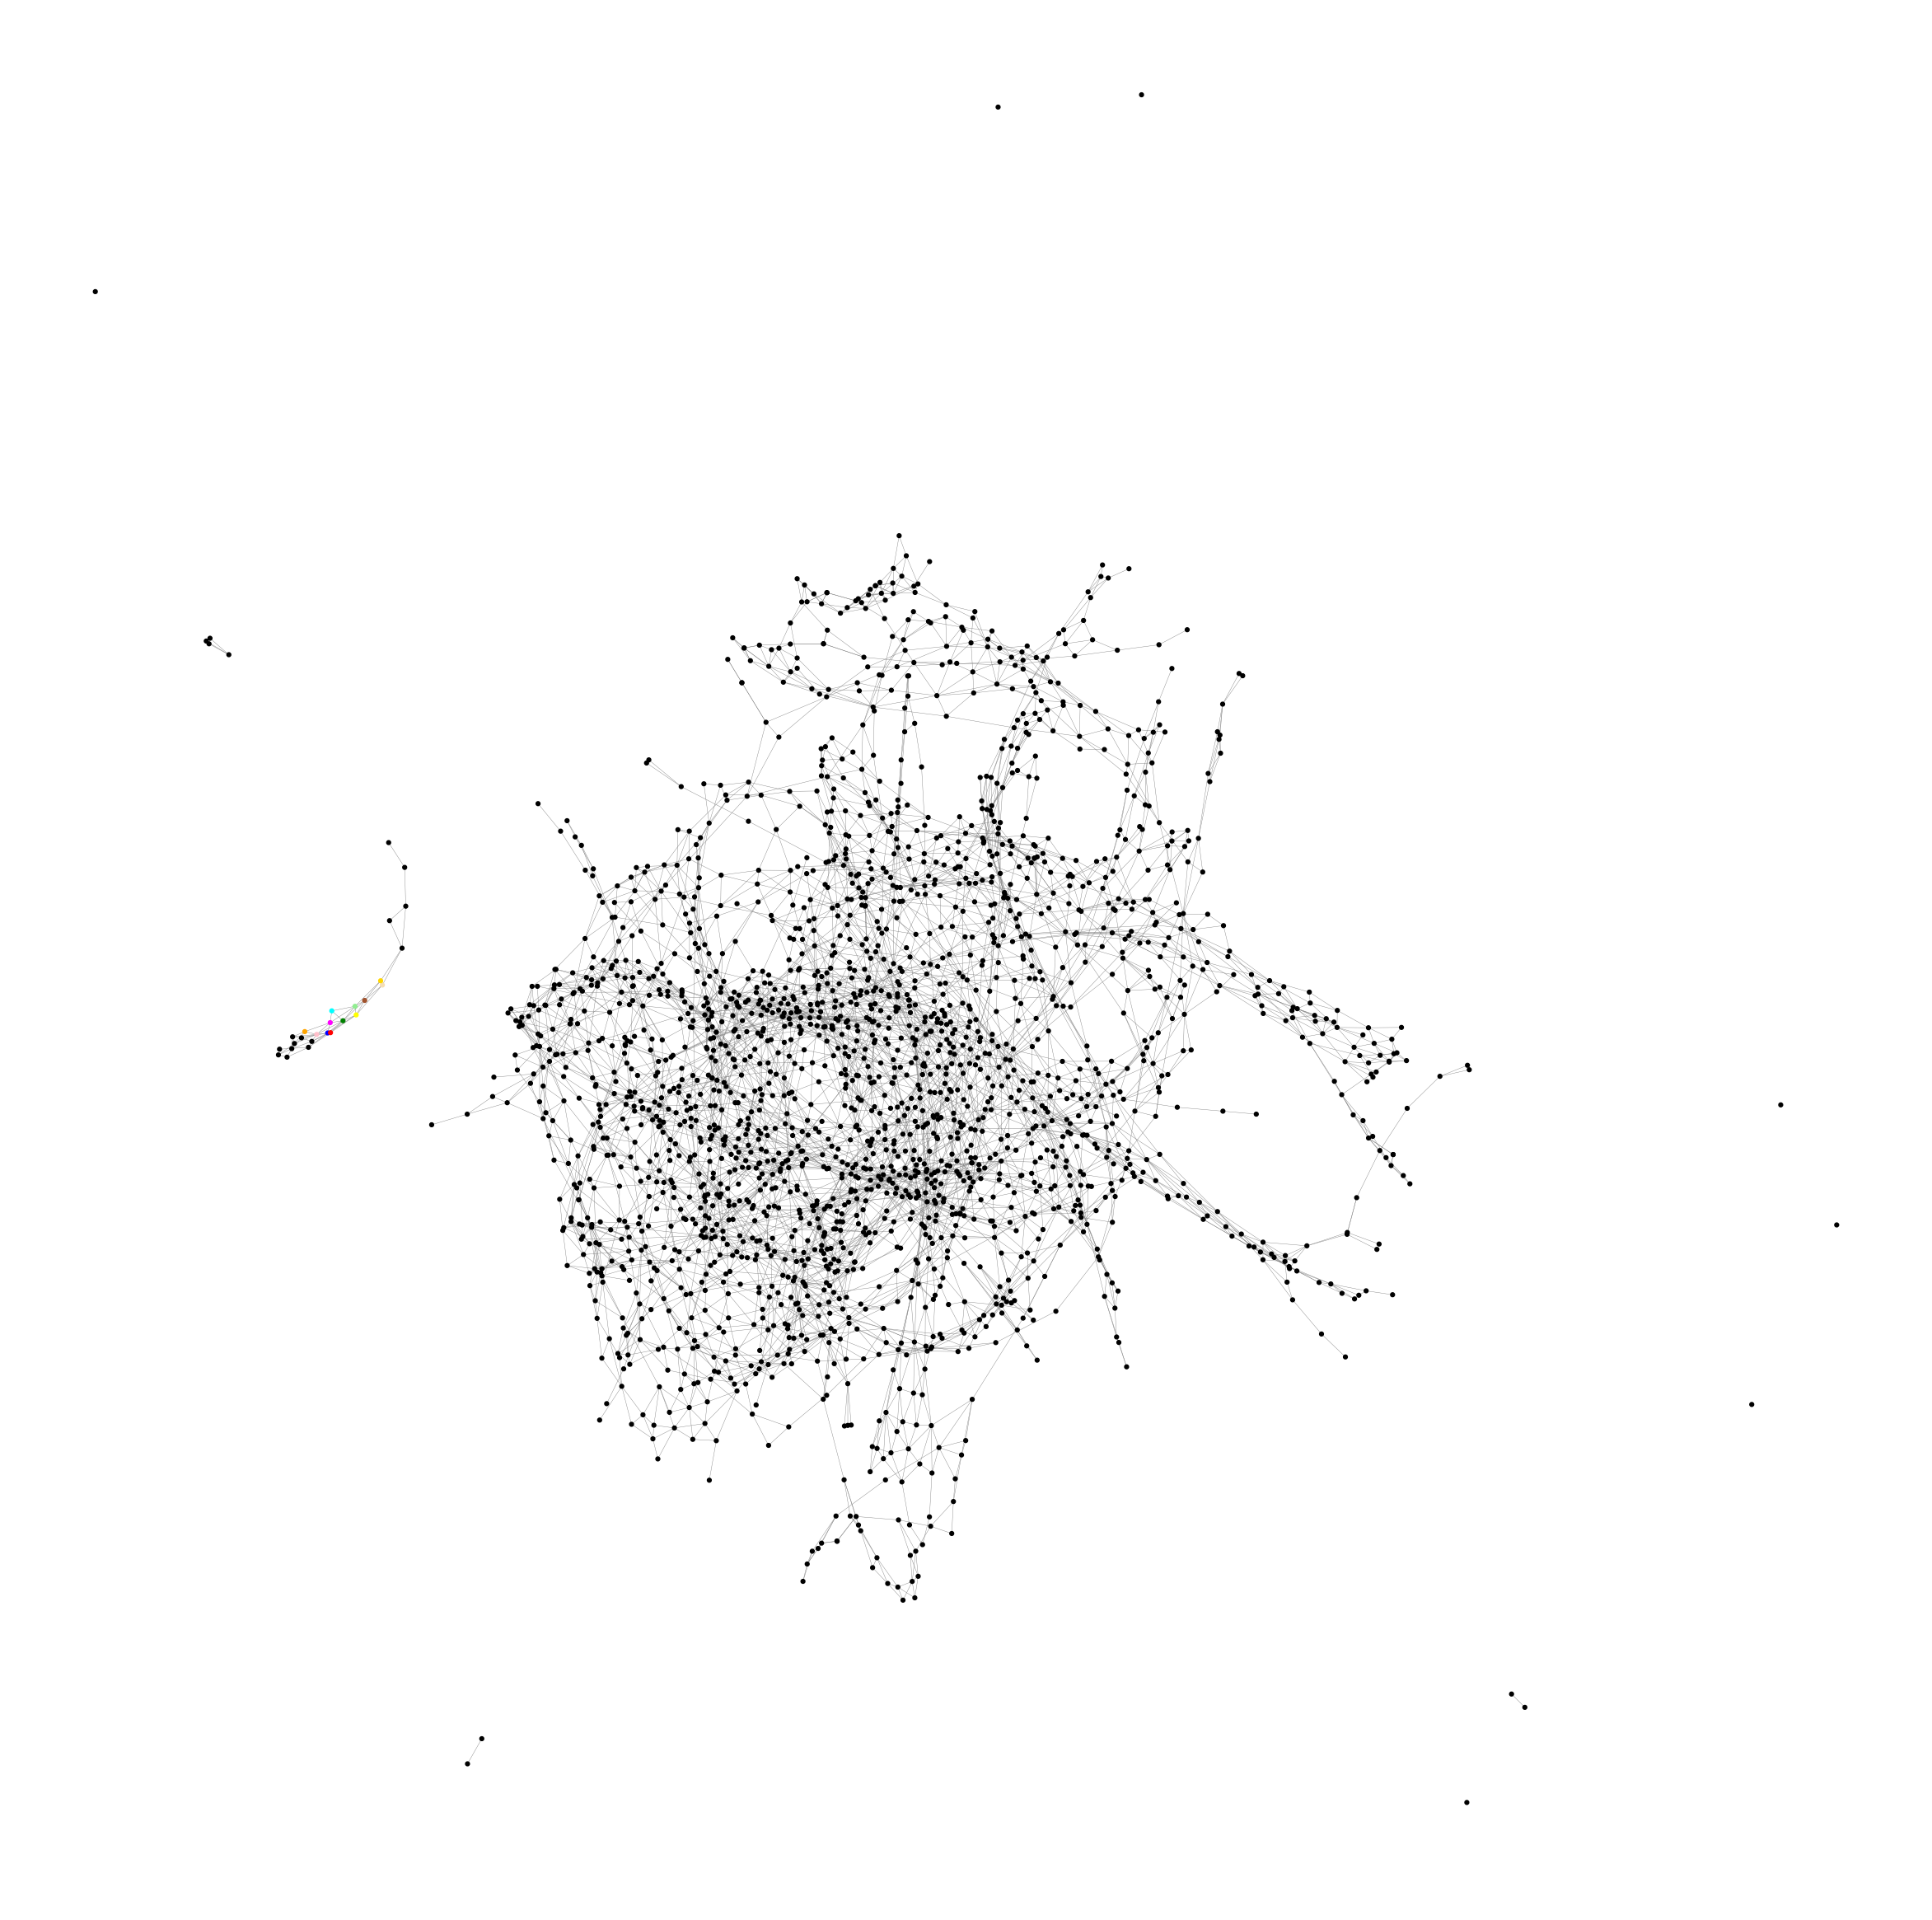

In [ ]:
import libpysal as lp
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.data import Data
from torch import torch

# Calculate census tract adjacency information for graph connectivity
gdf_neighbors = lp.weights.Queen.from_dataframe(df_map)
gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)

edge_index = gdf_adj_mtx_torch.nonzero().t().contiguous()
data = Data(x=X, edge_index=edge_index, y=y)

colors = [['black'] * len(X)]
colors = colors[0]

colors[-12] = 'blue'
colors[-11] = 'green'
colors[-10] = 'red'
colors[-9] = 'yellow'
colors[-8] = 'orange'
colors[-7] = 'magenta'
colors[-6] = 'pink'
colors[-5] = 'wheat'
colors[-4] = 'cyan'
colors[-3] = 'lightgreen'
colors[-2] = 'gold'
colors[-1] = 'sienna'

# Plot graph of all data with specific nodes correlated to the aforementioned sample color coded
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=False,
                node_size=12,
                node_color=colors,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.3,
                edge_color="grey",
                font_size=2,
                font_color='white'
              )
plt.show()

<ipython-input-155-0dd25fc045b8>:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  gdf_neighbors = lp.weights.Queen.from_dataframe(df_map)
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


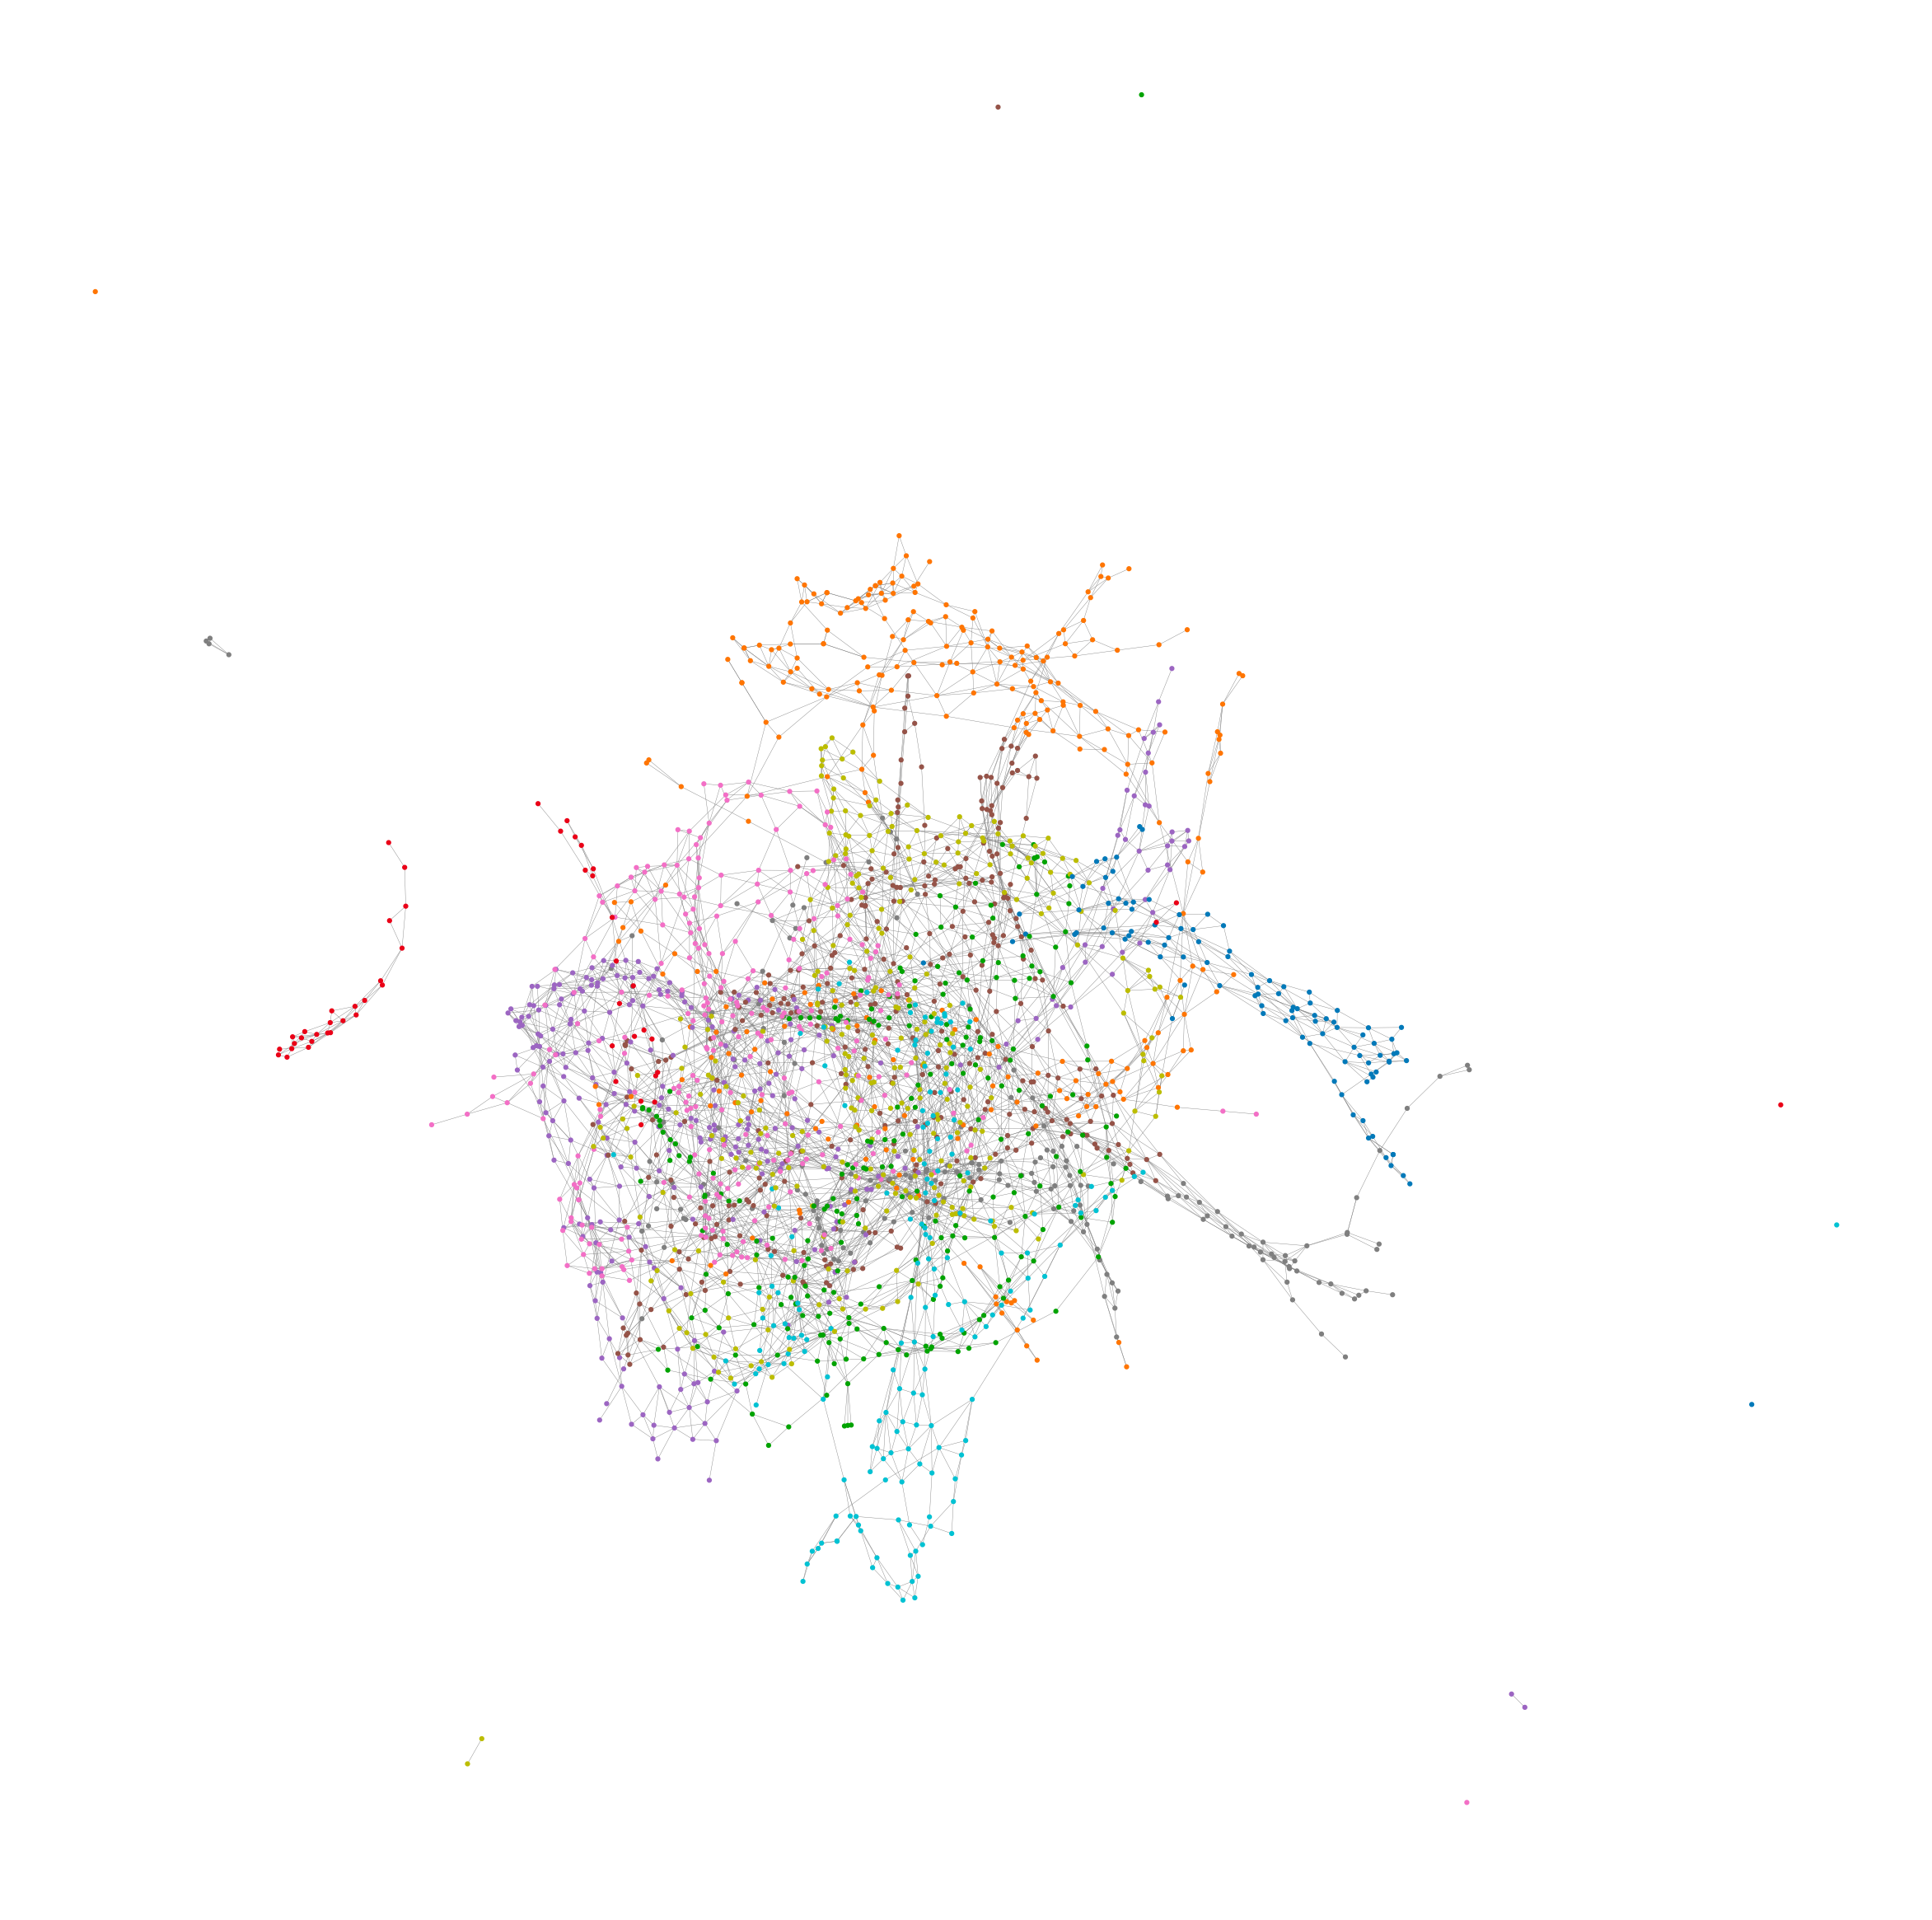

In [ ]:
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.data import Data
from torch import torch
import libpysal as lp

# Generating plots of census tract graph with nodes color-coded by cluster
gdf_neighbors = lp.weights.Queen.from_dataframe(df_map)
# gdf_neighbors = lp.weights.Queen.from_dataframe(X_test_map)

gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)
edge_index = gdf_adj_mtx_torch.nonzero().t().contiguous()

data = Data(x=X, edge_index=edge_index, y=y)
# data = Data(x=X_test, edge_index=edge_index, y=y_test)

colors = []
for index, row in df_map.iterrows():
# for index, row in X_test_map.iterrows():
  if row['cluster'] == 0:
    colors.append('#0179B9')
  if row['cluster'] == 1:
    colors.append('#FF7502')
  if row['cluster'] == 2:
    colors.append('#00A300')
  if row['cluster'] == 3:
    colors.append('#EA0017')
  if row['cluster'] == 4:
    colors.append('#9C65C2')
  if row['cluster'] == 5:
    colors.append('#955348')
  if row['cluster'] == 6:
    colors.append('#F36FC6')
  if row['cluster'] == 7:
    colors.append('#7F7F7F')
  if row['cluster'] == 8:
    colors.append('#BCBD00')
  if row['cluster'] == 9:
    colors.append('#00C2D3')

# Plot graph
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=False,
                node_size=12,
                node_color=colors,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.3,
                edge_color="grey",
                font_size=2,
                font_color='white'
              )
plt.show()

2343


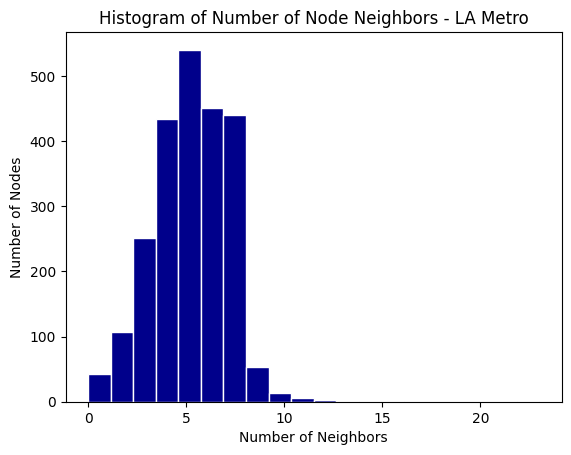

In [ ]:
# Display histogram of node connectivity in graph of all census tracts
vals = gdf_neighbors.histogram
data = []
for pair in vals:
  for i in range(pair[1]):
    data.append(pair[0])

plt.hist(data, bins=20, color='darkblue', edgecolor='white')
plt.title('Histogram of Number of Node Neighbors - LA Metro')
plt.ylabel('Number of Nodes')
plt.xlabel('Number of Neighbors')
plt.show()

# Graph Convolutional Neural Network Construction

In [ ]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils_data

class GCN(torch.nn.Module):
    def __init__(self, X_train, y_train):
        super().__init__()
        self.gcn = GCNConv(X_train.size()[1], 400)
        self.out = Linear(400, y_train.size()[1])

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

In [ ]:
from torch.autograd import Variable
import libpysal as lp

torch.set_default_dtype(torch.float64)
geo_col_names = list(geo.columns)[2:]
socio_col_names = list(socio.columns)[2:]

X = df_map[geo_col_names].values.astype('double')
y = df_map[socio_col_names].values.astype('double')

# Based on input validation set and test set cluster ids calculate the graphs for
# the training, validation, and test sets
def get_clusters_and_edge(val_id, test_id):
  X_train_map = df_map[(df_map["cluster"] != val_id) & (df_map["cluster"] != test_id)]
  y_train_map = df_map[(df_map["cluster"] != val_id) & (df_map["cluster"] != test_id)]

  X_val_map = df_map[df_map["cluster"] == val_id]
  y_val_map = df_map[df_map["cluster"] == val_id]

  X_test_map = df_map[df_map["cluster"] == test_id]
  y_test_map = df_map[df_map["cluster"] == test_id]

  X_train = X_train_map[geo_col_names].values.astype('double')
  y_train = y_train_map[socio_col_names].values.astype('double')

  X_val = X_val_map[geo_col_names].values.astype('double')
  y_val = y_val_map[socio_col_names].values.astype('double')

  X_test = X_test_map[geo_col_names].values.astype('double')
  y_test = y_test_map[socio_col_names].values.astype('double')

  X_train = Variable(torch.Tensor(X_train))
  y_train = Variable(torch.Tensor(y_train))
  X_val = Variable(torch.Tensor(X_val))
  y_val = Variable(torch.Tensor(y_val))
  X_test = Variable(torch.Tensor(X_test))
  y_test = Variable(torch.Tensor(y_test))

  # Training graph
  gdf_neighbors = lp.weights.Queen.from_dataframe(X_train_map)
  gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
  gdf_adj_list = gdf_neighbors.to_adjlist()
  gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)
  edge_index_train = gdf_adj_mtx_torch.nonzero().t().contiguous()

  # Validation graph
  gdf_neighbors = lp.weights.Queen.from_dataframe(X_val_map)
  gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
  gdf_adj_list = gdf_neighbors.to_adjlist()
  gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)
  edge_index_val = gdf_adj_mtx_torch.nonzero().t().contiguous()

  # Test graph
  gdf_neighbors = lp.weights.Queen.from_dataframe(X_test_map)
  gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
  gdf_adj_list = gdf_neighbors.to_adjlist()
  gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)
  edge_index_test = gdf_adj_mtx_torch.nonzero().t().contiguous()

  return [X_train,
          y_train,
          X_val,
          y_val,
          X_test,
          y_test,
          edge_index_train,
          edge_index_val,
          edge_index_test]

In [ ]:
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils_data

loss_fct = nn.MSELoss()

# Train the graph convolutional neural network with the configured validation
# and test set cluster ids
def train_gcnn_model(config):
  train_val_test_data = get_clusters_and_edge(config['val_id'], config['test_id'])
  X_train = train_val_test_data[0]
  y_train = train_val_test_data[1]
  X_val = train_val_test_data[2]
  y_val = train_val_test_data[3]
  X_test = train_val_test_data[4]
  y_test = train_val_test_data[5]
  edge_index_train = train_val_test_data[6]
  edge_index_val = train_val_test_data[7]
  edge_index_test = train_val_test_data[8]

  model = GCN(X_train, y_train)

  num_epoch = config['num_epoch']
  learning_rate = config['learning_rate']

  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=0.0001)

  epoch_loss = []
  epoch_val_loss = []
  best_loss = np.inf
  best_weights = None

  # Training
  for epoch in range(num_epoch):
    accuracy_loss = 0
    model.train()

    optimizer.zero_grad()

    pred = model(X_train, edge_index_train)
    loss = loss_fct(pred[1], y_train)

    loss.backward()
    optimizer.step()

    epoch_loss.append(loss.item())

    if epoch % 10 == 0:
        print ('Epoch [%d/%d], Loss: %.4f'
                  %(epoch+1, num_epoch, loss))

    model.eval()
    y_val_pred = model(X_val, edge_index_val)
    val_loss = loss_fct(y_val_pred[1], y_val)
    epoch_val_loss.append(val_loss.item())

    if val_loss < best_loss:
      best_loss = val_loss
      best_weights = copy.deepcopy(model.state_dict())

  y_test_pred = model(X_test, edge_index_test)
  test_loss = loss_fct(y_test_pred[1], y_test)

  return {"model": model,
        "epoch_loss": epoch_loss,
        "epoch_val_loss": epoch_val_loss,
        "best_val_loss": best_loss,
        "loss": test_loss.item()}

In [ ]:
import statistics

all_val_losses = []
all_test_losses = []
best_test_loss = np.inf

# Test all possible combinations of test and validation cluster ids, aside from
# combinations in which the two ids are equivalent
for test_cluster in range(10):
  print(f'------------------{test_cluster}------------------')
  for val_cluster in range(10):
    if val_cluster != test_cluster:
      params = {
          "learning_rate": 0.001,
          "num_epoch": 100,
          "val_id": val_cluster,
          "test_id": test_cluster
      }

      model_res = train_gcnn_model(params)
      model =  model_res['model']
      epoch_loss = model_res['epoch_loss']
      epoch_val_loss = model_res['epoch_val_loss']
      val_loss = model_res['best_val_loss'].item()
      test_loss = model_res['loss']

      all_val_losses.append(val_loss)
      all_test_losses.append(test_loss)

      if test_loss < best_test_loss:
        torch.save(model.state_dict(), '/content/drive/MyDrive/Thesis Data/Final Models/NYC-gcnn.model')
        best_model = model
        best_epoch_loss = epoch_loss
        best_epoch_val_loss = epoch_val_loss
        best_val_loss = val_loss
        best_test_loss = test_loss

        best_val_id = val_cluster
        best_test_id = test_cluster

print(best_test_loss)
print(best_epoch_loss)
print(best_epoch_val_loss)
print(best_val_loss)
print('--------------------------')
print(best_val_id)
print(best_test_id)
print('--------------------------')
print(statistics.mean(all_val_losses))
print(statistics.mean(all_test_losses))

{'learning_rate': 0.001, 'num_epoch': 300, 'val_id': 0, 'test_id': 5}


<ipython-input-67-85a56c831529>:49: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  gdf_neighbors = lp.weights.Queen.from_dataframe(X_train_map)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 5 islands with ids: 23, 893, 1132, 1151, 2441.
  W.__init__(self, neighbors, ids=ids, **kw)
<ipython-input-67-85a56c831529>:51: DeprecationWarning: In the next version of libpysal, observations with no neighbors will be included in adjacency lists as loops (row with the same focal and neighbor) with zero weight. In the current version, observations with no neighbors are dropped. If you would like to keep the current behavior, use drop_islands=True in this function
  gdf_adj_list = gdf_neighbors.to_adjlist()
<ipython-input-67-85a56c831529>:56: FutureWarning:

Epoch [1/300], Loss: 0.1435
Epoch [11/300], Loss: 0.0294
Epoch [21/300], Loss: 0.0278
Epoch [31/300], Loss: 0.0217
Epoch [41/300], Loss: 0.0202
Epoch [51/300], Loss: 0.0195
Epoch [61/300], Loss: 0.0189
Epoch [71/300], Loss: 0.0183
Epoch [81/300], Loss: 0.0176
Epoch [91/300], Loss: 0.0168
Epoch [101/300], Loss: 0.0160
Epoch [111/300], Loss: 0.0152
Epoch [121/300], Loss: 0.0144
Epoch [131/300], Loss: 0.0138
Epoch [141/300], Loss: 0.0133
Epoch [151/300], Loss: 0.0130
Epoch [161/300], Loss: 0.0127
Epoch [171/300], Loss: 0.0125
Epoch [181/300], Loss: 0.0124
Epoch [191/300], Loss: 0.0122
Epoch [201/300], Loss: 0.0121
Epoch [211/300], Loss: 0.0121
Epoch [221/300], Loss: 0.0120
Epoch [231/300], Loss: 0.0119
Epoch [241/300], Loss: 0.0119
Epoch [251/300], Loss: 0.0118
Epoch [261/300], Loss: 0.0118
Epoch [271/300], Loss: 0.0117
Epoch [281/300], Loss: 0.0117
Epoch [291/300], Loss: 0.0117
(tensor([[0.2330, 0.1674, 0.1507,  ..., 0.0000, 0.2107, 0.0305],
        [0.2106, 0.1371, 0.1259,  ..., 0.0000,

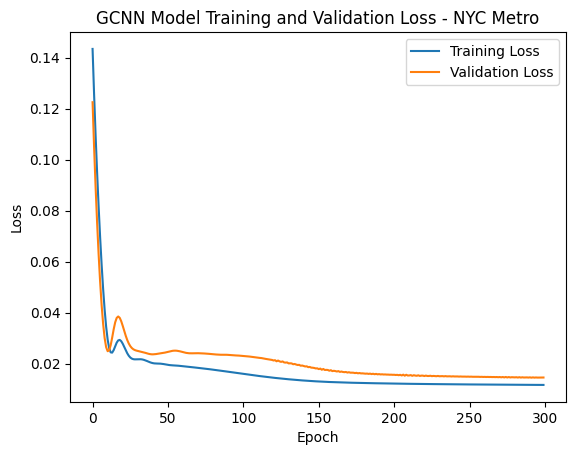

In [ ]:
params = {
  "learning_rate": 0.001,
  "num_epoch": 300,
  "val_id": best_val_id,
  "test_id": best_test_id
}
print(params)

train_val_test_data = get_clusters_and_edge(params['val_id'], params['test_id'])
X_train = train_val_test_data[0]
y_train = train_val_test_data[1]
X_val = train_val_test_data[2]
y_val = train_val_test_data[3]
X_test = train_val_test_data[4]
y_test = train_val_test_data[5]
edge_index_train = train_val_test_data[6]
edge_index_val = train_val_test_data[7]
edge_index_test = train_val_test_data[8]

model_res = train_gcnn_model(params)
model = model_res['model']

epoch_loss = model_res['epoch_loss']
epoch_val_loss = model_res['epoch_val_loss']
print(model(X_train, edge_index_train))

print("Best Validation Loss:", model_res['best_val_loss'].item())
print("Test Loss:", model_res['loss'])

# Plot GCNN model training and validation loss curves
plt.plot(epoch_loss, label="Training Loss")
plt.plot(epoch_val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GCNN Model Training and Validation Loss - NYC Metro")
plt.legend()
plt.show()

# Data Visualization

## Generate socioeconomic data predictions and build maps

In [ ]:
# Read in all geographic and socioeconomic data
geo = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/NYC_ALL_GEOGRAPHIC_DATA_FINAL.csv')
socio = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/NYC_ALL_SOCIOECONOMIC_DATA_FINAL.csv')

final_df = pd.read_csv('/content/drive/MyDrive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/NYC_SOCIO_AND_GEO_FINAL.csv')

all_fips = final_df['FIPS']

geo = final_df[list(geo.columns)[2:]]
socio = final_df[list(socio.columns)[2:]]

# Min/Max Normalization
all_geo=(geo-geo.min())/(geo.max()-geo.min())
all_geo = all_geo.to_numpy()
all_geo = Variable(torch.Tensor(all_geo))

socio_min_max = {}
for col in list(socio.columns):
  socio_min_max[col] = [socio[col].min(), socio[col].max()]

print(all_geo.shape)

In [ ]:
# Read in geodatasets
cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_new_york_metroarea1Edited.zip')
# cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_los_angeles_metroarea1Edited.zip')

cts['FIPS'] = cts['FIPS'].astype('str')
final_df['FIPS'] = final_df['FIPS'].astype('str')

# Execute only for LA geodata since the gpd shapefile has a '0' in front of every FIPS code
# cts['FIPS'] = cts['FIPS'].apply(lambda x: x[1:])

# Calculate graph with all census tracts that have all geographic data, even if
# they don't have all socioeconomic data (since this data will be predicted by the model)
all_geo_merged = final_df.merge(cts, how = 'outer', on = 'FIPS', indicator=True)
all_geo_merged = all_geo_merged[all_geo_merged['_merge']=='both']

all_geo_merged = gpd.GeoDataFrame(
    all_geo_merged, geometry=all_geo_merged['geometry'], crs="EPSG:4326"
)
gdf_neighbors = lp.weights.Queen.from_dataframe(all_geo_merged)
gdf_adj_mtx, gdf_adj_mtx_indices = gdf_neighbors.full()
gdf_adj_list = gdf_neighbors.to_adjlist()
gdf_adj_mtx_torch = torch.from_numpy(gdf_adj_mtx)
edge_index_all = gdf_adj_mtx_torch.nonzero().t().contiguous()

In [ ]:
# !pip install folium matplotlib mapclassify
import numpy as np
import pandas as pd
import geopandas as gpd
import requests

# Calculate predicted data for GCNN model
y_all_data_pred = model(all_geo, edge_index_all)[1].detach().numpy()

# Calculate predicted data for Linear and MLP models
# y_all_data_pred = model(all_geo).detach().numpy()

y_all_data_pred = pd.DataFrame(y_all_data_pred, columns = socio_col_names)

# Un-normalize all predicted data
for col in list(y_all_data_pred.columns):
  y_all_data_pred[col] = (y_all_data_pred[col] * (socio_min_max[col][1] - socio_min_max[col][0])) + socio_min_max[col][0]

# Calculate percent error of predictions
percent_error = socio - y_all_data_pred
percent_error = (percent_error / socio) * 100.0

# Calculate the average socioeconomic prediction percent error for each census tract
mean_df = pd.DataFrame()
mean_df['Average Socioeconomic Prediction Percent Error'] = percent_error.mean(axis=1)
new = mean_df.join(all_fips)

# Calculate percent error of each socioeconomic prediction for each census tract
# new = percent_error.join(all_fips)
# new_labels = list(new.columns + ' Percent Error')
# new_labels[-1] = 'FIPS'
# new.columns = new_labels

# Calculate the predicted socioeconomic variables for each census tract
# new = y_all_data_pred.join(all_fips)
# new_labels = list('Predicted ' + new.columns)
# new_labels[-1] = 'FIPS'
# new.columns = new_labels
# new['FIPS'] = new['FIPS'].astype(str)

# Table of average prediction error for each socioeconomic variable
# percent_error.replace([np.inf, -np.inf], np.nan, inplace=True)
# mean_df = pd.DataFrame()
# mean_df['Average Socioeconomic Prediction Percent Error'] = percent_error.mean(axis=0)
# mean_df.sort_values(by=['Average Socioeconomic Prediction Percent Error'], inplace=True)

# for row in mean_df.iterrows():
#   var = row[0].replace('%', "\\%")
#   var = var.replace('$', '\\$')
#   print(var + " & " + str(round(row[1][0], 2)) + " \\\\")
#   print('\hline')

## Generate maps of GCNN-predicted socioeconomic data and other statistics

In [ ]:
cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_new_york_metroarea1Edited.zip')
# cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_los_angeles_metroarea1Edited.zip')

# Execute only for LA geodata since the gpd shapefile has a '0' in front of every FIPS code
# cts['FIPS'] = cts['FIPS'].apply(lambda x: x[1:])

new['FIPS'] = new['FIPS'].astype('str')

data = new
data = data.round(2)
df_map = cts.merge(data, how = 'outer', on = 'FIPS')

links = []

# Generate html file containing a map of every column of the dataset
for column in list(data.columns):
  if not column == "FIPS":
    m = df_map.explore(
        column = column,
        tooltip = list(data.columns),
        tiles = 'CartoDB positron',
        vmin = -100.0,
        vmax = 100.0
    )

    filename = column.replace(' ', '-').replace('.', '') + '.html'

    m.save(f'/content/Brett-Zeligson-Thesis/Results/GCNN/NYC/{filename}')
    links.append(f'https://zeligsonbrett.github.io/Brett-Zeligson-Thesis/Results/GCNN/NYC/{filename}')
    print(filename)

# Links to access the html files once they've been hosted on GitHub
print(links)

## Generate maps of Linear and MLP model-predicted socioeconomic data and other statistics

In [ ]:
# https://www.natekratzer.com/posts/census_map/

import numpy as np
import pandas as pd
import geopandas as gpd
import requests

# cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_new_york_metroarea1Edited.zip')
cts = gpd.read_file('/content/drive/My Drive/Thesis Data/Shapefiles/CT_los_angeles_metroarea1Edited.zip')
cts['FIPS'] = cts['FIPS'].astype(str)

# for LA datasets
cts['FIPS'] = cts['FIPS'].apply(lambda x: x[1:])

# filename = 'NYC_ALL_SOCIOECONOMIC_DATA_FINAL.csv'
filename = 'LA_ALL_SOCIOECONOMIC_DATA_FINAL.csv'
data = pd.read_csv('/content/drive/My Drive/Thesis Data/Big Data Sets with Everything Together/FINAL DATASETS/' + filename)

data['FIPS'] = data['FIPS'].astype(str)
data = data.round(2)

df_map = cts.merge(data, how = 'outer', on = 'FIPS')
links = []

# Generate html file containing a map of every column of the dataset
for column in list(data.columns[1:]):
  m = df_map.explore(
      column = column,
      tooltip = list(data.columns[1:]),
      tiles = 'CartoDB positron'
  )

  filename = column.replace(' ', '-').replace('.', '') + '.html'
  m.save(f'./Brett-Zeligson-Thesis/LA/socio/{filename}')
  !(cd Brett-Zeligson-Thesis && git add .)
  run = f'(cd Brett-Zeligson-Thesis && git commit -m "{filename}")'
  !{run}
  !(cd Brett-Zeligson-Thesis && git push)
  links.append(f'https://zeligsonbrett.github.io/Brett-Zeligson-Thesis/LA/socio/{filename}')

# Links to access the html files once they've been hosted on GitHub
print(links)

## Correlation Coefficient Matrix

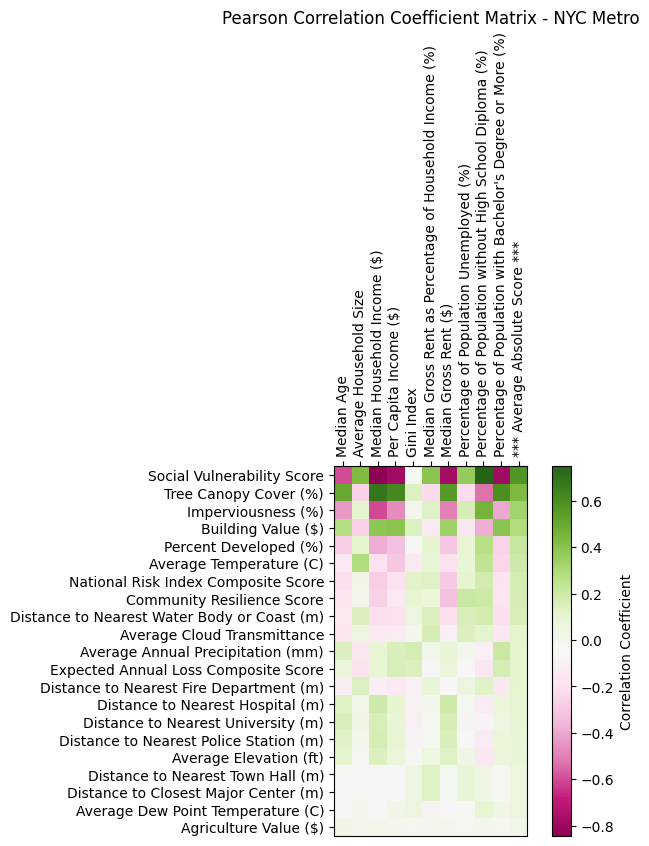

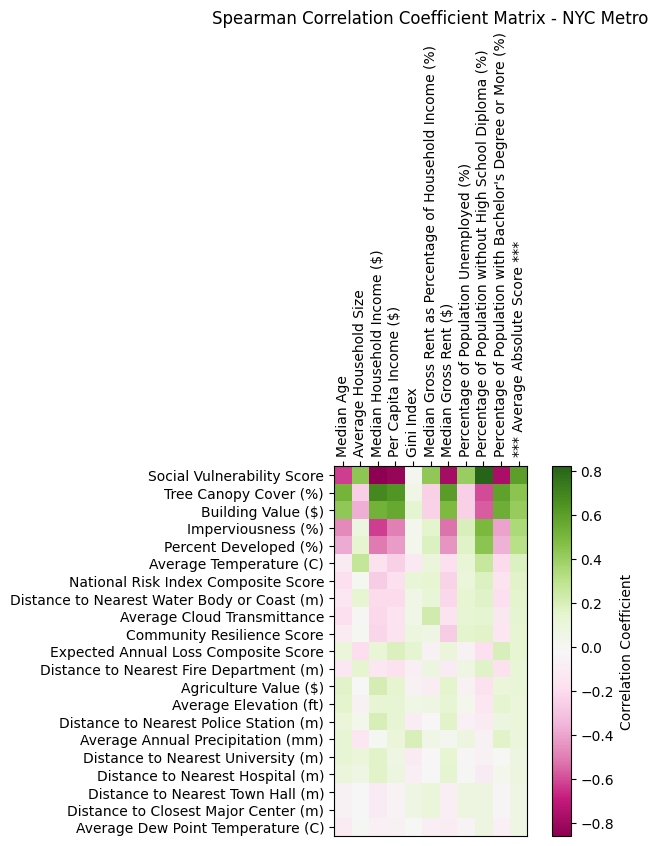

In [ ]:
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import csv

all_pearson = []
all_spearman = []
pearson_dict = {}
spearman_dict = {}
final_df = final_df.dropna()

# Calculate the pearson and spearman correlation coefficients for every combination
# of geographic and socioeconomic variables
for geo in geo_col_names:
  graph_pearson = []
  graph_spearman = []
  pearson_total = 0
  spearman_total = 0
  for soc in socio_col_names:
    x_var = geo
    y_var = soc
    x = final_df[x_var]
    y = final_df[y_var]

    p_corr, _ = pearsonr(x, y)
    s_corr, _ = spearmanr(x, y)

    graph_pearson.append(p_corr)
    graph_spearman.append(s_corr)

    pearson_total += abs(p_corr)
    spearman_total += abs(s_corr)

  # Calculate average coefficient values for a given geographic variable
  graph_pearson.append(pearson_total / len(socio_col_names))
  graph_spearman.append(spearman_total / len(socio_col_names))

  pearson_dict[geo] = pearson_total / len(socio_col_names)
  spearman_dict[geo] = spearman_total / len(socio_col_names)

  all_pearson.append(graph_pearson)
  all_spearman.append(graph_spearman)

# Plot bar graphs instead of matrix
# X_axis = np.arange(len(socio_col_names) + 1)
# plt.bar(X_axis - 0.2, graph_pearson, color='r', width=0.5,  align='center', label="Pearson Coefficient")
# plt.bar(X_axis + 0.2, graph_spearman, width=0.5,  align='center', label="Spearman Coefficient")
# plt.xticks(X_axis, socio_col_names + ['*** Average Absolute Score ***'])
# plt.xticks(rotation=90)
# plt.ylabel("Coefficient")
# plt.title(f"{geo} Coefficient by Socio Category")
# plt.gca().set_ylim([-1, 1])
# plt.legend()
# plt.show()

# Sort geographic variables by their average spearman and pearson correlation
# coefficients
sorted_pearson = sorted(pearson_dict.items(), key=lambda x:x[1], reverse=True)
sorted_spearman = sorted(spearman_dict.items(), key=lambda x:x[1], reverse=True)

pearson_labels = [item[0] for item in sorted_pearson]
spearman_labels = [item[0] for item in sorted_spearman]

socio_col_names_new = socio_col_names.copy()
for i, col in enumerate(socio_col_names_new):
  socio_col_names_new[i] = col.replace('_', ' ')

# Build correlation coefficient matrix
def plot(input, title, is_pearson):
  fig, ax = plt.subplots()

  input.sort(key=lambda x: x[-1], reverse=True)
  data = np.array(input)
  cax = ax.matshow(data, cmap='PiYG')

  ax.set_yticks(range(len(input)))
  ax.set_xticks(range(len(input[0])))

  if is_pearson:
    ax.set_yticklabels(pearson_labels)
  else:
    ax.set_yticklabels(spearman_labels)
  ax.set_xticklabels(socio_col_names_new + ['*** Average Absolute Score ***'])

  ax.yaxis.set_ticks_position('left')
  ax.xaxis.set_ticks_position('top')
  plt.xticks(rotation=90)

  cbar = fig.colorbar(cax)
  cbar.set_label('Correlation Coefficient')
  plt.title(title)

plot(all_pearson, 'Pearson Correlation Coefficient Matrix - NYC Metro', True)
plot(all_spearman, 'Spearman Correlation Coefficient Matrix - NYC Metro', False)

## Add Files to GitHub

Authenticate and clone repository

In [ ]:
# GitHub authentication and cloning of repo
# !git config --global user.email "zeligsonbrett@gmail.com"
# !git config --global user.name "Brett Zeligson"

# !ssh-keygen -t ed25519
# !cat /root/.ssh/id_ed25519.pub

# !ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
# !git clone git@github.com:zeligsonbrett/Brett-Zeligson-Thesis.git

Commands to pull down code and push updates

In [ ]:
!(cd Brett-Zeligson-Thesis && git add .)
run = f'(cd Brett-Zeligson-Thesis && git commit -m "Added folders")'
!{run}
!(cd Brett-Zeligson-Thesiss && git push)

# !(cd Brett-Zeligson-Thesis && git pull)